# Basic Root Locus Design
## Topic 10 - RL design

In [1]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf, rlocus, step, feedback, lsim, bode
from control import pade

from control_materials import *

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found
This is a library of useful functions for the control systems in 16.06


## Analyze impact of adding Integrator


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.385
At possible locations s = -0.423


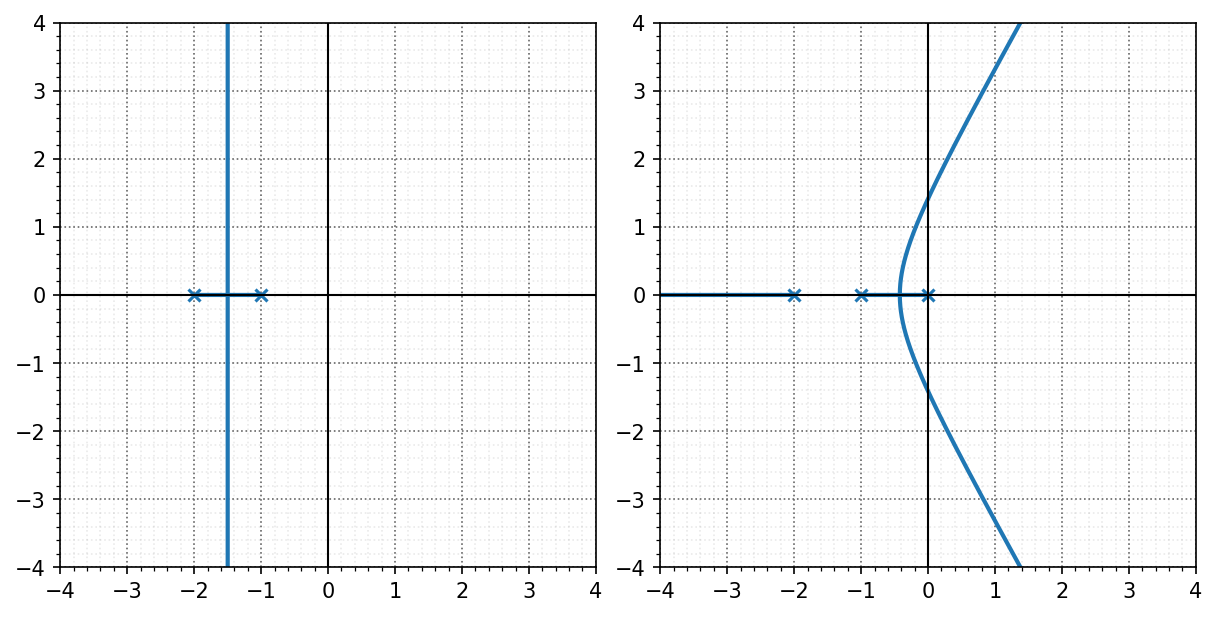

In [2]:
G0 = tf(1, (1,3,2))

# pole to the left
G1 = G0*tf((0, 1), (1, 0))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0),  grid=False,ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])

rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist),  grid=False,ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
savefig("./figs/L12_1.pdf", dpi=600)
plt.show()

## Analyze impact of adding PI


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.151
At possible locations s = -0.468


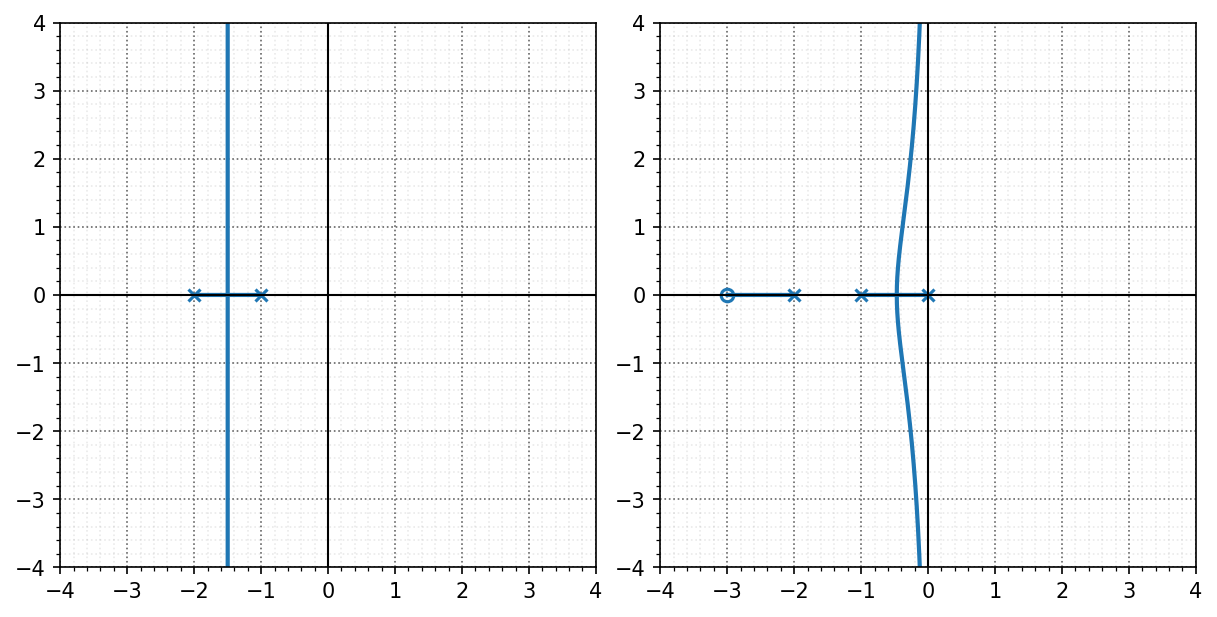

In [3]:
G1 = G0*tf((1, 3), (1, 0))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0),  grid=False,ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])

rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist),  grid=False,ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
savefig("./figs/L12_2.pdf", dpi=600)
plt.show()

## Analyze impact of adding D


Found breakin/out at K = 0.250
At possible locations s = 1.500

Found breakin/out at K = 0.172
At possible locations s = 1.414

Found breakin/out at K = 5.828
At possible locations s = -1.414


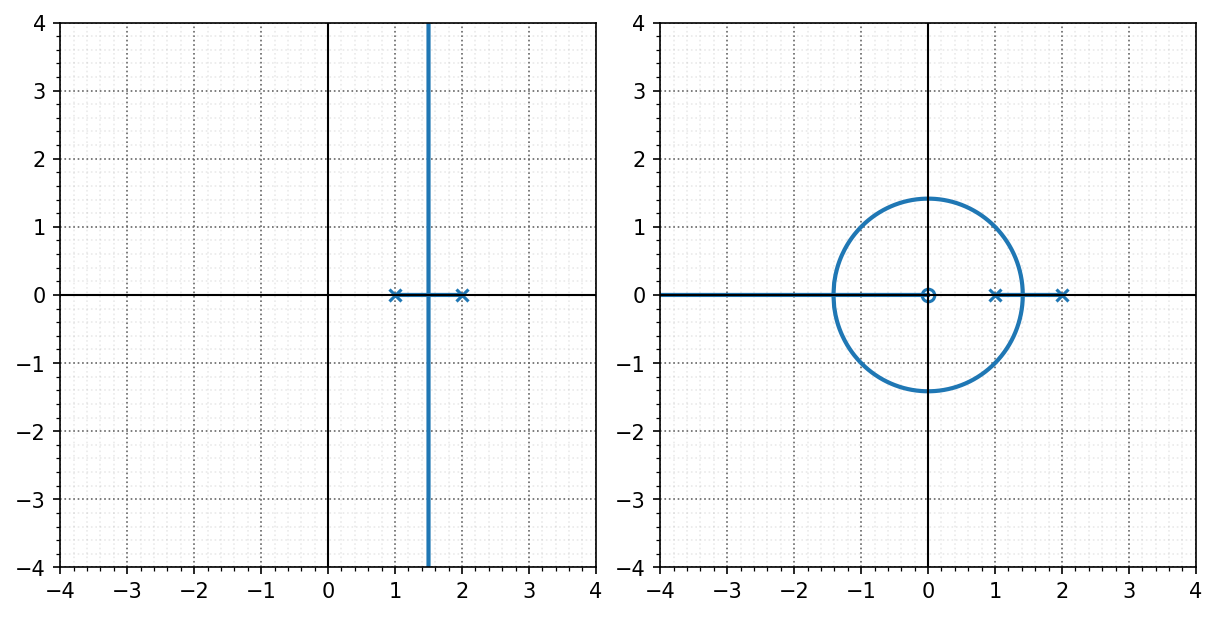

In [4]:
G0 = tf(1, (1,-3,2))
G1 = G0*tf((1, 0), (1))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0),  grid=False,ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])

rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist),  grid=False,ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
savefig("./figs/L12_3.pdf", dpi=600)
plt.show()

## Analyze impact of adding PD


Found breakin/out at K = 0.250
At possible locations s = 1.500

Found breakin/out at K = 9.899
At possible locations s = -3.449

Found breakin/out at K = 0.101
At possible locations s = 1.449


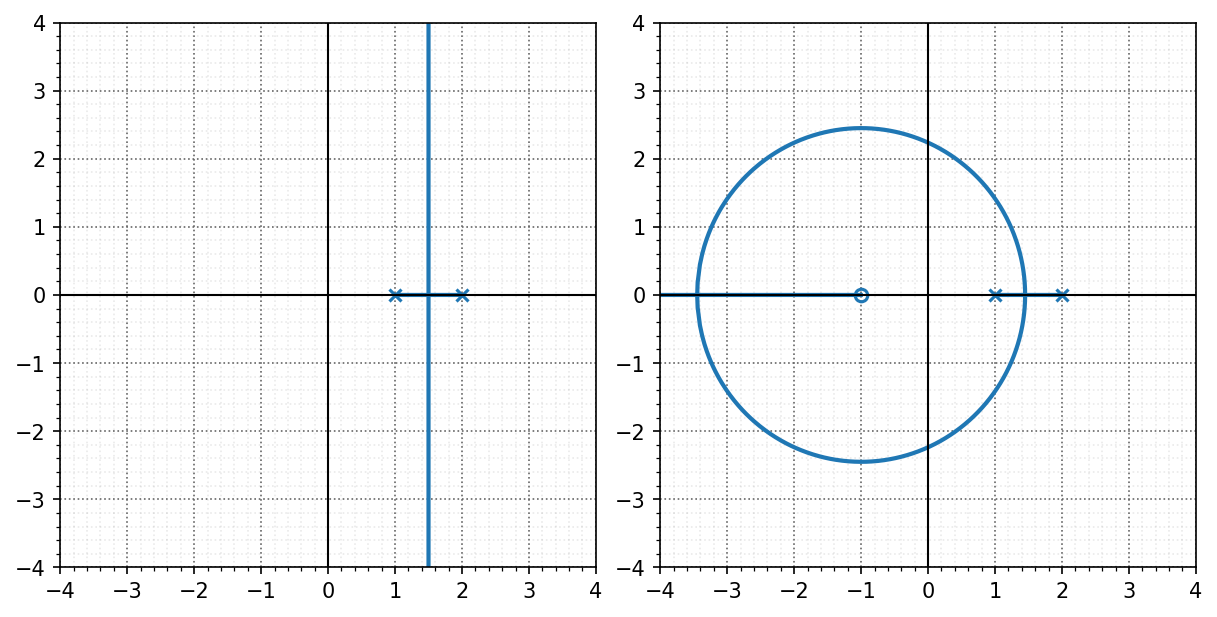

In [5]:
G0 = tf(1, (1,-3,2))
G1 = G0*tf((1, 1), (1))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0),  grid=False,ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])

rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist),  grid=False,ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
savefig("./figs/L12_4.pdf", dpi=600)
plt.show()

## Use filter to avoid high frequency issue with PD

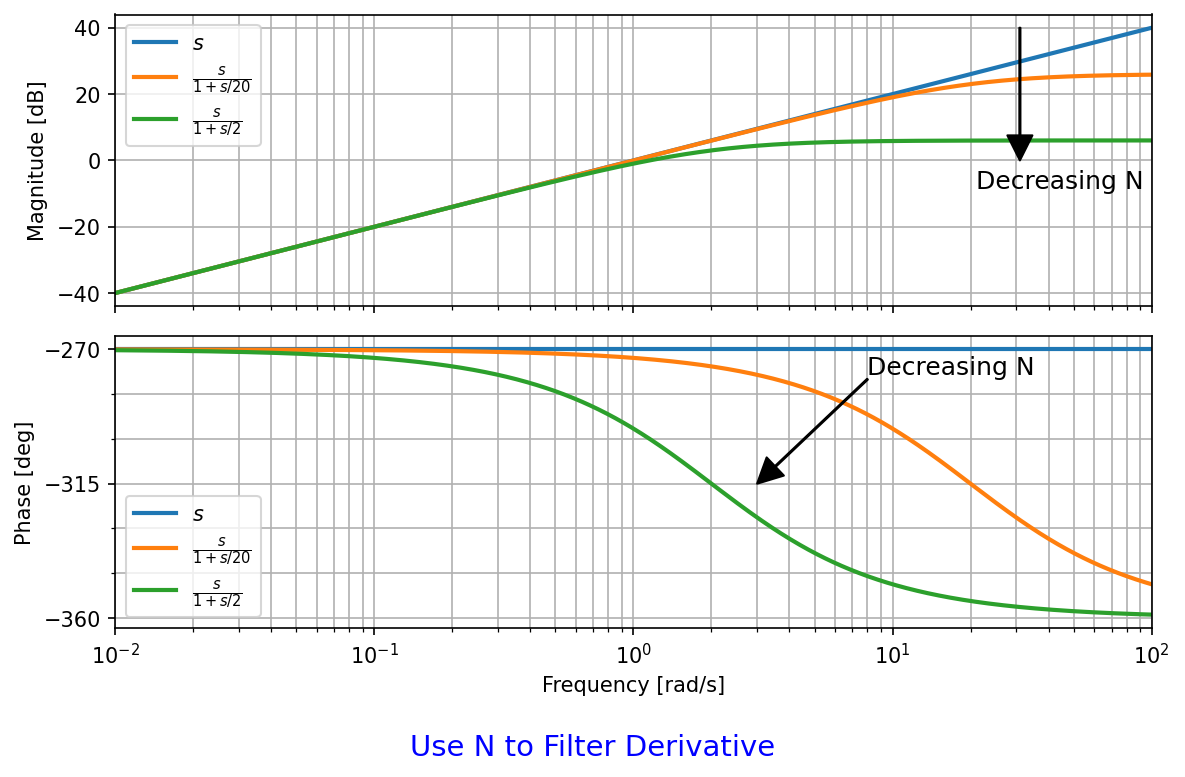

In [6]:
w = np.logspace(-2, 2, 1000)
G_deriv = tf((1,0), (0,1))
G_deriv_2 = tf((1,0), (1/2,1))
G_deriv_20 = tf((1,0), (1/20,1))
fig, ax = plt.subplots(2,1,figsize=(8, 5),dpi=150,constrained_layout = True)
Gfreq = bode(G_deriv,w,plot=True)
Gfreq20 = bode(G_deriv_20,w,plot=True)
Gfreq2 = bode(G_deriv_2,w,plot=True)
ax1,ax2 = plt.gcf().axes
ax1.legend((r'$s$',r'$\frac{s}{1+s/20}$',r'$\frac{s}{1+s/2}$'))
ax2.legend((r'$s$',r'$\frac{s}{1+s/20}$',r'$\frac{s}{1+s/2}$'))
ax1.annotate('',xy=(31, 0), xytext=(31, 40), 
            arrowprops=dict(facecolor='black', shrink=0., width=0.5),
            )
ax2.annotate('', xy=(3, -315), xytext=(8, -280), 
            arrowprops=dict(facecolor='black', shrink=0., width=0.5),
            )
ax1.text(21, -10, 'Decreasing N', fontsize=12, verticalalignment='bottom')
ax2.text(8, -280, 'Decreasing N', fontsize=12, verticalalignment='bottom')
caption("Use N to Filter Derivative",fig)
savefig("./figs/L12_5.pdf", dpi=600)


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

f_signal = 5  # Frequency of the signal
HP_freq = 2*f_signal # Cutoff frequency of the high-pass filter
LP_freq = 1.5*f_signal # Cutoff frequency of the low-pass filter
amp_noise = 0.05 # Amplitude of the noise

# Create a time vector
dt = 0.005  # Time step
t = np.arange(0, 6, dt)  # Time vector
N = len(t)  # Number of samples
frequencies = np.fft.fftfreq(N, dt)  # Frequency vector in Hz

# Create a signal (e.g., a sine wave)
signal = np.sin(2 * np.pi * f_signal * t)  # 5 Hz sine wave
dsignal = 2 * np.pi * f_signal * np.cos(2 * np.pi * f_signal * t)
# Design a high-pass filter to add the noise
# If fs is specified, Wn is in the same units as fs.
b, a = butter(N = 6, Wn = HP_freq, btype='high', fs=1/dt)  
# Generate high frequency noise
noise = amp_noise * np.random.randn(len(t))  # Gaussian noise
# Apply the high-pass filter to the noise
filtered_noise = lfilter(b, a, noise)

# Add the filtered noise to the signal
noisy_signal = signal + filtered_noise
#derivative_noisy_signal = np.diff(noisy_signal) / np.diff(t)

In [42]:
class BackwardDifferenceFilter:
    def __init__(self, dt):
        self.dt = dt

    def differentiate(self, y):
        return np.diff(y) / self.dt

class LowPassDifferentiator:
    def __init__(self, dt, cutoff_freq, order=1):
        self.dt = dt
        self.cutoff_freq = cutoff_freq
        self.order = order
        self.b, self.a = butter(order, cutoff_freq, btype='low', fs=1/dt)

    def differentiate(self, y):
        dy = np.diff(y) / self.dt
        return lfilter(self.b, self.a, dy)

# Create instances of the filters
backward_diff_filter = BackwardDifferenceFilter(dt)
low_pass_diff_filter = LowPassDifferentiator(dt, cutoff_freq = LP_freq, order=1)

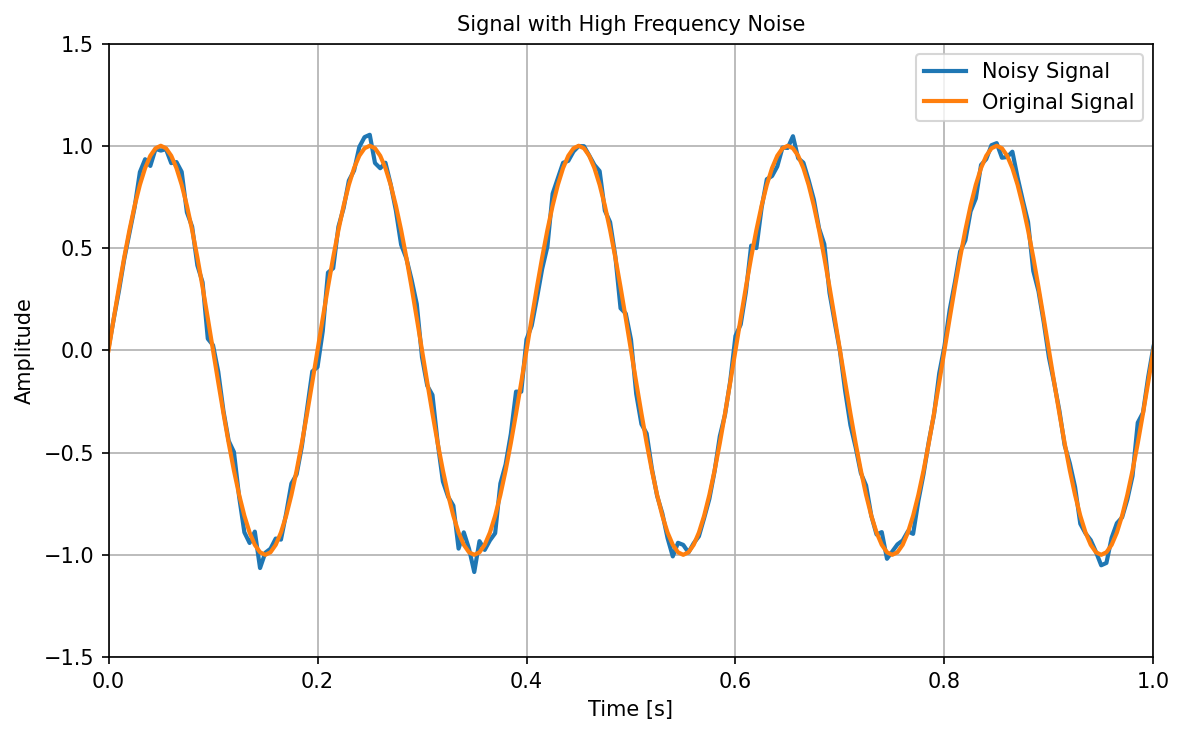

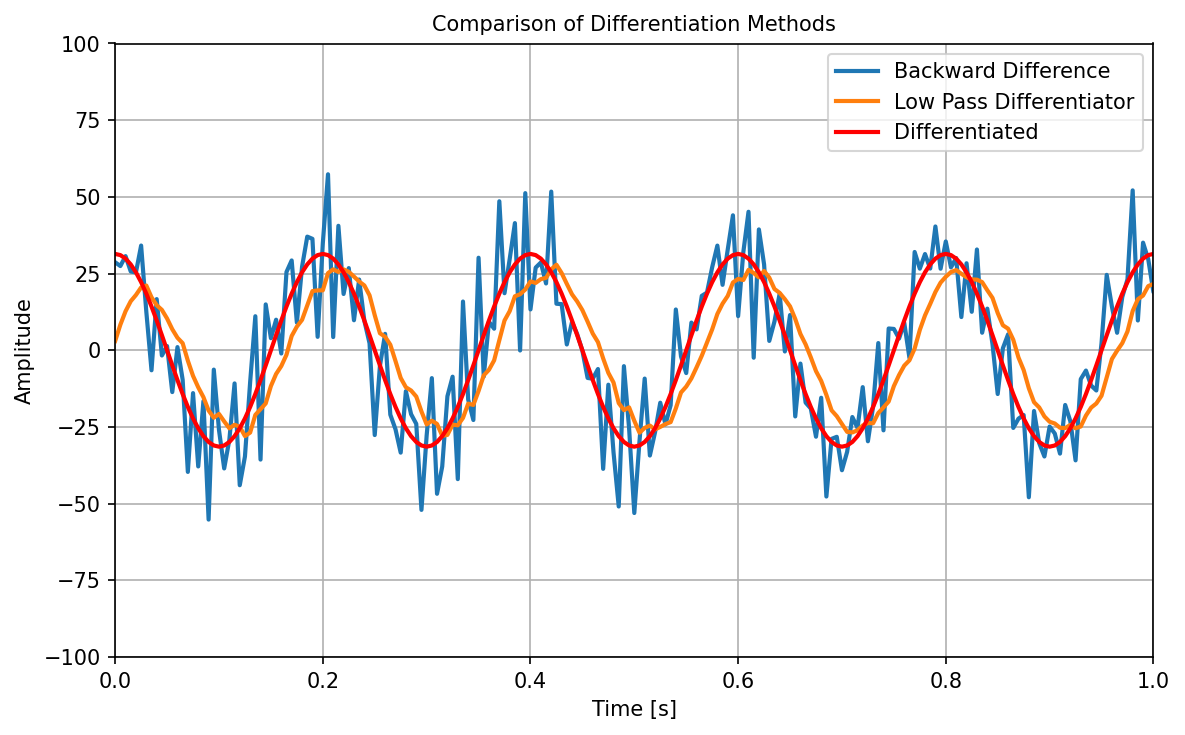

In [43]:
# Apply the filters to the noisy signal
backward_diff_result = backward_diff_filter.differentiate(noisy_signal)
low_pass_diff_result = low_pass_diff_filter.differentiate(noisy_signal)

# Plot the noisy signal
plt.figure(figsize=(8, 5))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, signal, label='Original Signal', linewidth=2)
plt.xlabel('Time [s]')
plt.xlim(0,1)
plt.ylim(-1.5,1.5)
plt.ylabel('Amplitude')
plt.title('Signal with High Frequency Noise')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(t[:-1], backward_diff_result, label='Backward Difference')
plt.plot(t[:-1], low_pass_diff_result, label='Low Pass Differentiator')
plt.plot(t, dsignal, 'r', label='Differentiated')
plt.xlim(0,1)
plt.ylim(-100,100)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Comparison of Differentiation Methods')
plt.legend()
plt.grid(True)
plt.show()

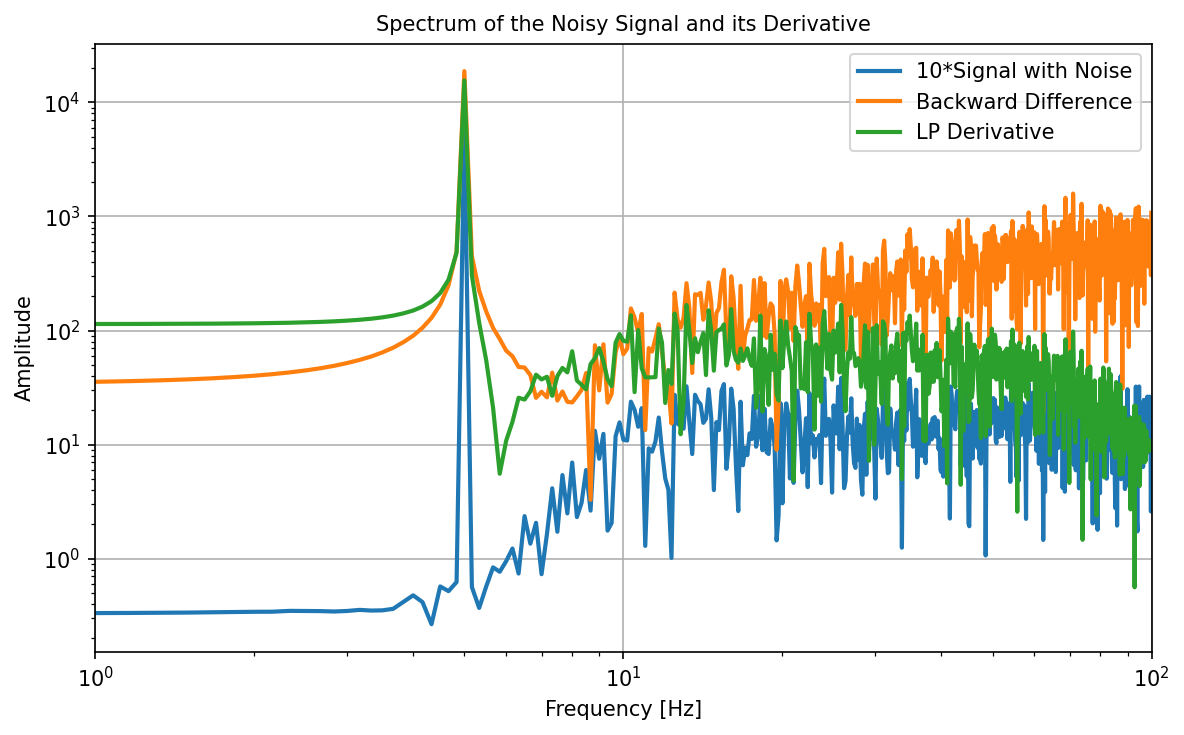

In [54]:
spectrum = np.fft.fft(noisy_signal)
spectrum_bw = np.fft.fft(backward_diff_result)
spectrum_lp = np.fft.fft(low_pass_diff_result)
Ns = len(spectrum)

# Compute the Fourier Transform of the derivative of the noisy signal
# Plot the spectrum of the noisy signal and its derivative
plt.figure(figsize=(8, 5))
plt.loglog(frequencies[:Ns//2], 1e1*np.abs(spectrum)[:Ns//2], label='10*Signal with Noise')
plt.loglog(frequencies[:Ns//2], np.abs(spectrum_bw)[:Ns//2], label='Backward Difference')
plt.loglog(frequencies[:Nf//2], np.abs(spectrum_lp)[:Nf//2], label='LP Derivative')
plt.xlim(1, 1/dt/2)  # Limit x-axis to positive frequencies
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum of the Noisy Signal and its Derivative')
plt.legend()
plt.grid(True)
plt.show()